# ¿A que se debe la perdida de los clientes?

# ¿Que deberiamos cambiar para mejorar esta situación?

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importadores que uso el profesor en la clase que uso Bokeh
import bokeh as bk
from bokeh.palettes import Spectral6
from bokeh.io import show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.io import output_notebook # Sumamente importante tenerlo

from bokeh.resources import INLINE
output_notebook(INLINE)





## Introduccion

**Contexto empresarial.** La empresa Telco ha exprimientado una perdida muy significativa de clientes en el ultimo trimestre. Necesitan encontrar la causa y una solucion para dicho problema.
A partir de esto se recopilo toda la informacion que se tenia de los clientes del ultimo trimestre(Estado del servicio de los clientes, Informacion detallada de los clientes y Detalles de los contratos de los clientes).

La empresa te ha contratado para que construyas visualizaciones que les ayuden a identificar las causas principales de las perdidas, como solucionar el problema para prevenir posibles perdidas a futuro y como recuperar a los clientes perdidos.


**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona tres archivos CSV (almacenado en la carpeta ```datos``` ya creada). A continuacion se detalla el nombre de cada uno de los archivos y los detalles de como se componen:

*  Telco_customer_churn_services: Detalles de los contratos de los clientes.
*  Telco_customer_churn_status: Estado del servicio de los clientes.
*  Telco_customer_churn_demographics: Informacion detallada de los clientes.

El delimitador en el archivo CSV dado es `,`. 

Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales de los DataFrame brindados en un archivo JSON
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Que porcentaje de clientes perdimos en el ultimo trimestre?
2. ¿Cual es la causa principal de la perdida de clientes?
3. ¿Que varibles tienen en comun los clientes que descontrataron el servicio (Por ejemplo: Edad, genero, etc)?
4. ¿Que tipo de contranto tenian la mayoria de los clientes que abandonaron la empresa?
5. ¿Cuantas ofertas de servicios tuvieron los clientes que abandonaron la empresa?
6. ¿Que acciones podriamos tomar para revertir esta situción?
7. ¿QUe deberiamos cambiar para prevenir este situacion a futuro?


## Overview de la data

In [42]:
#importacion de DataFrames

tipo_contrtato = "https://raw.githubusercontent.com/Ipaulenas/CoderHouse/main/datos/Telco_customer_churn_services.csv"
df1 = pd.read_csv (tipo_contrtato)      # Detalles de los contratos de los clientes

estado_del_servicio = "https://raw.githubusercontent.com/Ipaulenas/CoderHouse/main/datos/Telco_customer_churn_status.csv"
df2 = pd.read_csv (estado_del_servicio) # Estado del servicio de los clientes

datos_clientes = "https://raw.githubusercontent.com/Ipaulenas/CoderHouse/main/datos/Telco_customer_churn_demographics.csv"
df3 = pd.read_csv (datos_clientes)      # Informacion detallada de los clientes

# Uno los dos DataFrame df1 y df2 en función de la columna “Customer ID”
df_comb_1_2 = pd.merge(df2, df1, on='Customer ID')

# Uno los dos DataFrame df_comb_1_2  y df3 en función de la columna “Customer ID”
df_final = pd.merge(df_comb_1_2, df3, on='Customer ID')
# Imprimimos el data set final
df_final.head(5)

,Customer ID,Count_x,Quarter_x,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason,Count_y,Quarter_y,...,Total Long Distance Charges,Total Revenue,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Q3,Churned,Yes,1,Competitor,Competitor offered more data,1,Q3,...,0.00,59.65,1,M,78,No,Yes,No,No,0
1,7495-OOKFY,1,Q3,Churned,Yes,1,Competitor,Competitor made better offer,1,Q3,...,390.80,1024.10,1,F,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Q3,Churned,Yes,1,Competitor,Competitor made better offer,1,Q3,...,203.94,1910.88,1,M,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Q3,Churned,Yes,1,Dissatisfaction,Limited range of services,1,Q3,...,494.00,2995.07,1,F,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Q3,Churned,Yes,1,Price,Extra data charges,1,Q3,...,234.21,3102.36,1,F,80,No,Yes,Yes,Yes,1


In [43]:
df_final.columns

Index(['Customer ID', 'Count_x', 'Quarter_x', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Category', 'Churn Reason', 'Count_y', 'Quarter_y',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents'],
      dtype='object')

Tenemos las siguientes columnas en cada uno de los DataFrame:
1.   **Telco_customer_churn_services:**
          *   Customer ID: Una identificación única que identifica a cada cliente.
          *   Count: Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado.
          *   Quarter: El trimestre del que se derivaron los datos (por ejemplo, Q3).
          *   Referred a Friend: Indica si el cliente alguna vez recomendó a un amigo o familiar a esta empresa: Sí, No
          *   Number of Referrals: Indica el número de referidos a la fecha que ha realizado el cliente.
          *   Tenure in Months: Indica la cantidad total de meses que el cliente ha estado con la empresa al final del trimestre especificado anteriormente.
          *   Offer: Identifica la última oferta de marketing que el cliente aceptó, si aplica. Los valores incluyen Ninguno, Oferta A, Oferta B, Oferta C, Oferta D y Oferta E.
          *   Phone Service: Indica si el cliente contrata el servicio de telefonía residencial con la empresa: Si, No
          *   Avg Monthly Long Distance Charges: Indica los cargos promedio de larga distancia del cliente, calculados al final del trimestre especificado anteriormente.
          *   Multiple Lines: Indica si el cliente contrata líneas telefónicas múltiples con la empresa: Si, No
          *   Internet Service: Indica si el cliente contrata el servicio de Internet con la empresa: No, Si
          *   Internet Type: El tipo de internet que usa el cliente DSL, Fiber Optic, Cable.
          *   Online Security: Indica si el cliente se suscribe a un servicio adicional de seguridad online proporcionado por la empresa: Si, No
          *   Online Backup: Indica si el cliente se suscribe a un servicio adicional de respaldo en línea brindado por la empresa: Si, No
          *   Device Protection Plan: Indica si el cliente se suscribe a un plan adicional de protección de dispositivos para su equipo de Internet provisto por la empresa: Si, No
          *   Premium Tech Support: Indica si el cliente se suscribe a un plan de soporte técnico adicional de la empresa con tiempos de espera reducidos: Si, No
          *   Streaming TV: Indica si el cliente utiliza su servicio de Internet para transmitir programación de televisión de un tercero proveedor: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
          *   Streaming Movies: Indica si el cliente utiliza su servicio de Internet para transmitir películas de un proveedor externo: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
          *   Streaming Music: Indica si el cliente utiliza su servicio de Internet para transmitir música de un proveedor externo: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
          *   Unlimited Data: Indica si el cliente ha pagado una tarifa mensual adicional para tener descargas/cargas de datos ilimitadas: Sí, No
          *   Contract: Indica el tipo de contrato actual del cliente: Mes a Mes, Un Año, Dos Años.
          *   Paperless Billing: Indica si el cliente ha elegido la facturación sin papel: Sí, No
          *   Payment Method: Indica cómo el cliente paga su factura: Retiro bancario, Tarjeta de crédito, Cheque enviado por correo
          *   Total Charges: Indica los cargos totales del cliente, calculados al final del trimestre especificado anteriormente.
          *   Total Refunds: Indica los reembolsos totales del cliente, calculados al final del trimestre especificado anteriormente.
          *   Total Extra Data Charges: Indica los cargos totales del cliente por descargas de datos adicionales por encima de los especificados en su plan, al final del trimestre especificado anteriormente.
          *   Total Long Distance Charges: Indica los cargos totales de larga distancia del cliente por encima de los especificados en su plan, al final del trimestre especificado anteriormente.
        *   Total Revenue: Ingresos totales  

2.   **Telco_customer_churn_status:**
          *   Customer ID: Una identificación única que identifica a cada cliente.
          *   Count: Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado.
          *   Quarter: El trimestre del que se derivaron los datos (por ejemplo, Q3)
          *   Customer Status: Indica el estado del cliente al final del trimestre: Churned, Stayed o Joined  
          *   Churn Label: Sí = el cliente dejó la empresa este trimestre. No = el cliente se quedó con la empresa. Directamente relacionado con Churn Value.
          *   Churn Value: 1 = el cliente dejó la empresa este trimestre. 0 = el cliente se quedó con la empresa. Directamente relacionado con Churn Label.
          *   Churn Category: Una categoría de alto nivel para el motivo del abandono del cliente: actitud, competidor, insatisfacción, otro, precio. Cuando se van de la empresa, a todos los clientes se les pregunta por los motivos de su salida. Directamente relacionado con Churn Reason.
          *   Churn Reason: El motivo específico de un cliente para abandonar la empresa. Directamente relacionado con la categoría Churn.

3.   **Telco_customer_churn_demographics:**
          *   Customer ID: Una identificación única que identifica a cada cliente.
          *   Count: Un valor que se utiliza en los informes/paneles para resumir el número de clientes en un conjunto filtrado.
          *   Gender: El género del cliente: Masculino, Femenino 
          *   Age: La edad actual del cliente, en años, en el momento en que finalizó el trimestre.
          *   Under 30: Indica si el cliente tiene menos de 30 años de edad: Sí, No 
          *   Senior Citizen: Indica si el cliente tiene 65 años o más: Sí, No 
          *   Married: Indica si el cliente está casado: Si, No
          *   Dependents: Indica si el cliente vive con algún dependiente: Sí, No. Los dependientes pueden ser hijos, padres, abuelos, etc.
          *   Number of Dependents: Indica el número de dependientes que viven con el cliente.


## Respondiendo las preguntas del cliente 

###¿Que porcentaje de clientes perdimos en el ultimo trimestre?

Se genera un grafico de tortas a partir de los estados de los clientes (Stayed, Churned y Joined).

Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: Customer Status, dtype: float64


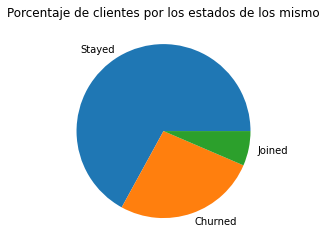

In [44]:
cant = df_final['Customer Status'].value_counts()
total_clientes = len(df_final.index)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

fig, y = plt.subplots ()
y.set_title("Porcentaje de clientes por los estados de los mismo")
y = plt.pie (cant_p  , labels = cant_p.index )


1. ¿Que porcentaje de clientes perdimos en el ultimo trimestre?

Luego de generar el grafico se puede observar que el 26% de los clientes estan descontratando el servicio. Y como podemos ver los nuevos clientes que contrataron el servicio llegan al 6% por ende estamos teniendo una gran perdida de clientes.

Esto genera otras dos consultas ¿Cual es el motivo principal que los clientes descontraten el servicio? y ¿A que se debe el baja contratacion del servicio?

### 2. ¿Cual es la causa principal de la perdida de clientes?
Se genera un gráfico de barras para analizar cuales son las causas de perdidas de clientes.


Competitor         11.940934
Attitude            4.458327
Dissatisfaction     4.302144
Price               2.995882
Other               2.839699
Name: Churn Category, dtype: float64


Text(0, 0.5, 'Cantidad de clientes')

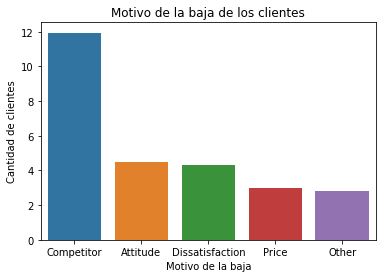

In [18]:
cant = df_final['Churn Category'].value_counts()
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

#print (cant)
g = sns.barplot(data = df_final, x = cant_p.index, y =  cant_p)  
g.set_title("Motivo de la baja de los clientes")
g.set_xlabel('Motivo de la baja')
g.set_ylabel('Cantidad de clientes')

Competitor had better devices                4.444129
Competitor made better offer                 4.415732
Attitude of support person                   3.123669
Don't know                                   1.845804
Competitor offered more data                 1.661224
Competitor offered higher download speeds    1.419849
Attitude of service provider                 1.334659
Price too high                               1.107483
Product dissatisfaction                      1.093284
Network reliability                          1.022292
Long distance charges                        0.908704
Service dissatisfaction                      0.894505
Moved                                        0.653131
Extra data charges                           0.553741
Limited range of services                    0.525344
Poor expertise of online support             0.440153
Lack of affordable download/upload speed     0.425955
Lack of self-service on Website              0.411756
Poor expertise of phone supp

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Competitor had better devices'),
  Text(1, 0, 'Competitor made better offer'),
  Text(2, 0, 'Attitude of support person'),
  Text(3, 0, "Don't know"),
  Text(4, 0, 'Competitor offered more data'),
  Text(5, 0, 'Competitor offered higher download speeds'),
  Text(6, 0, 'Attitude of service provider'),
  Text(7, 0, 'Price too high'),
  Text(8, 0, 'Product dissatisfaction'),
  Text(9, 0, 'Network reliability'),
  Text(10, 0, 'Long distance charges'),
  Text(11, 0, 'Service dissatisfaction'),
  Text(12, 0, 'Moved'),
  Text(13, 0, 'Extra data charges'),
  Text(14, 0, 'Limited range of services'),
  Text(15, 0, 'Poor expertise of online support'),
  Text(16, 0, 'Lack of affordable download/upload speed'),
  Text(17, 0, 'Lack of self-service on Website'),
  Text(18, 0, 'Poor expertise of phone support'),
  Text(19, 0, 'Deceased')])

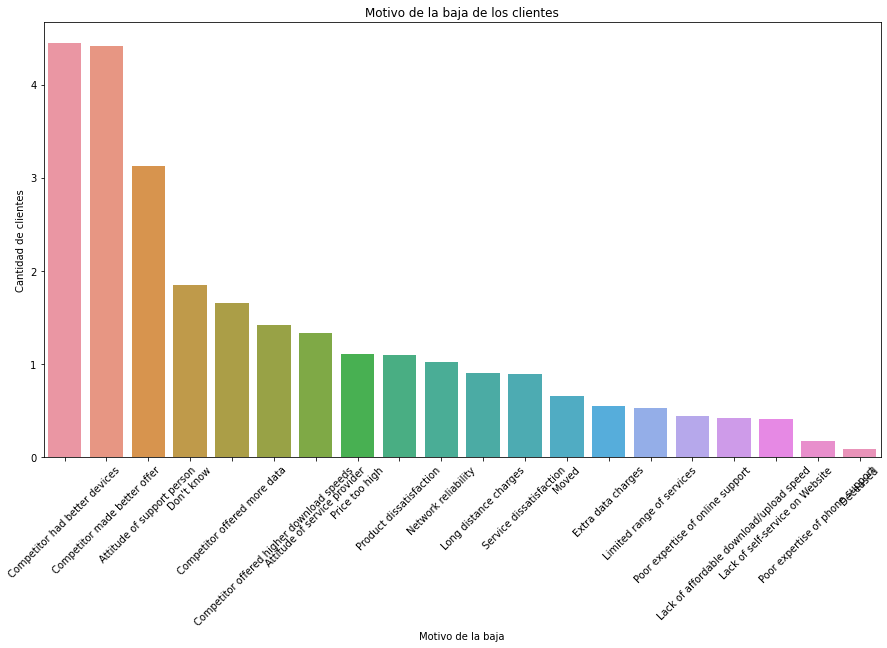

In [19]:
cant = df_final['Churn Reason'].value_counts()
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

#print (cant)
plt.figure(figsize = (15,8))

g = sns.barplot(data = df_final, x = cant_p.index, y =  cant_p  )

g.set_title("Motivo de la baja de los clientes")
g.set_xlabel('Motivo de la baja')
g.set_ylabel('Cantidad de clientes')

plt.xticks(rotation=45)

¿Cual es la causa principal de la perdida de clientes?



A partir del primer grafico podemos verificar que las principales causas de que los clientes soliciten la baja estan realacionadas 11% con la competencia, el 4% actitud, 4% por no estar satifecho con el servicio, 3% por el precio y 3% por otros motivos.

Con el segundo grafico vamos a analizar las causas mas detalladas para enteneder que fue lo que genero la mayor pedida de clientes. Las principales causas fueron las ofertas (4% de la bajas) y los dispositvos que ofrecen la copentencia (4% de la bajas).

### 3. ¿Que varibles tienen en comun los clientes que descontrataron el servicio (Por ejemplo: Edad, genero, etc)?
Se genera un grafico de puntos de dispercion para analizar si hay alguna relacion entre la edad y el genero entre los clientes que descontrataron el servicio.

Primero limpiamos la tabla ya que tenemos 4 varibles de genero (Female, F, Male y M). Se remplaza las variables para tener solo 2 posibles valores (F, M).

In [40]:
df_final = df_final.replace({"Female": "F", "Male": "M"})

Text(26.353281250000002, 0.5, 'Cantidad de clientes')

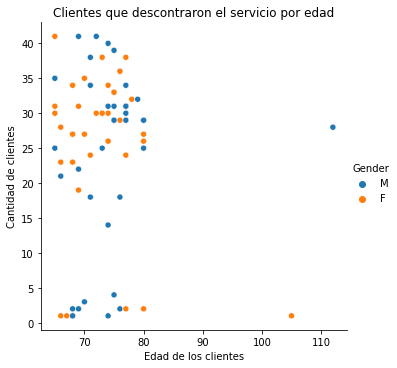

In [41]:

g = sns.relplot(data = df_final, x = df_final['Age'].loc[df_final['Customer Status'] == "Churned"] , y = df_final['Age'].loc[df_final['Customer Status'] == "Churned"].value_counts () , hue = df_final['Gender'] )

plt.title("Clientes que descontraron el servicio por edad")
plt.xlabel('Edad de los clientes')
plt.ylabel('Cantidad de clientes')




¿Que varibles tienen en comun los clientes que descontrataron el servicio (Por ejemplo: Edad, genero, etc)?
La edad realizando un simple analisis con la variable del genero no parecen ser varibles que den incidios de un patron relacionado con la descontratacion del servicio.

### 4. ¿Que tipo de contranto tenian la mayoria de los clientes que abandonaron la empresa?
Se generan graficos de barras para ver la cantidad de clientes que descontrataron el servicio segun el tipo de contranto que tenian.


Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64


Text(0, 0.5, '% de clientes')

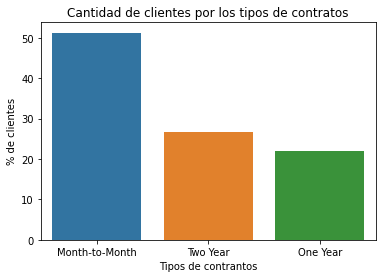

In [20]:
#Calculo la cantiadad de clientes por tipos de contrato
y = df_final['Contract'].value_counts()
print (y)
# Total de los clientes
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
y_porcentaje = (df_final['Contract'].value_counts() * 100 ) / total_clientes
# Grafico de barras con Seaborn
g = sns.barplot(data = df_final, x = y_porcentaje.index, y =  y_porcentaje)  
g.set_title("Cantidad de clientes por los tipos de contratos")
g.set_xlabel('Tipos de contrantos')
g.set_ylabel('% de clientes')


Month-to-Month    1655
One Year           166
Two Year            48
Name: Contract, dtype: int64
1869
Month-to-Month    88.550027
One Year           8.881755
Two Year           2.568218
Name: Contract, dtype: float64


Text(0, 0.5, '% de clientes')

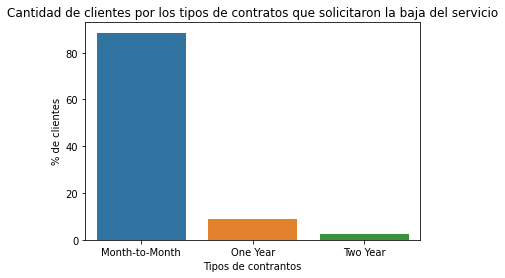

In [25]:
#Calculo la cantiadad de clientes por tipos de contrato
y = df_final['Contract']
#print (y)
# Total de los clientes que descontrataron el servicio por cada tipo de contranto
y =  y.loc[df_final['Customer Status'] == "Churned"].value_counts ()
print (y)
# Total de clientes que descontrataron el servicio
total_clientes = len (df_final['Customer Status'].loc[df_final['Customer Status'] == "Churned"])
print (total_clientes)
y_porcentaje = (y * 100 ) / total_clientes 
print (y_porcentaje)

# Grafico de barras con Seaborn
g = sns.barplot(data = df_final, x = y_porcentaje.index, y =  y_porcentaje)  
g.set_title("Cantidad de clientes por los tipos de contratos que solicitaron la baja del servicio")
g.set_xlabel('Tipos de contrantos')
g.set_ylabel('% de clientes')



¿Que tipo de contranto tenian la mayoria de los clientes que abandonaron la empresa?
Se observa que el 88% de los clientes que descontrataron el sevicio tenian un contrato de mes a mes.
